In [195]:
# imports
import os
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from sklearn.utils import shuffle



In [196]:
print(os.listdir('input'))

['sample_submission.csv', 'test', 'train', 'train.csv']


In [197]:
data_dir = "input"
train_dir = data_dir + "/train/"
test_dir = data_dir + "/test/"
train_f_url = data_dir + "/train.csv"
test_f_url = data_dir + "/sample_submission.csv"
train_df = pd.read_csv(train_f_url)
test_df = pd.read_csv(test_f_url)

In [198]:
from IPython.display import Image
t_img_size = 200
Image(data=train_dir+train_df.iloc[0, 0], width=t_img_size, height=t_img_size)
print("Classification: 1 if has cactus 0 if no cactus : Value: {0}".format(train_df.iloc[0, 1]))

Classification: 1 if has cactus 0 if no cactus : Value: 1


In [199]:
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [200]:
train_df['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [201]:
print("Test rows {0} and columns {1}".format(test_df.shape[0], test_df.shape[1]))

Test rows 4000 and columns 2


In [202]:
print("Train rows {0} and columns {1}".format(train_df.shape[0], train_df.shape[1]))

Train rows 17500 and columns 2


In [203]:
cacti = train_df[train_df.has_cactus==1].sample(n=3, random_state=42)
not_cacti = train_df[train_df.has_cactus==0].sample(n=3, random_state=50)

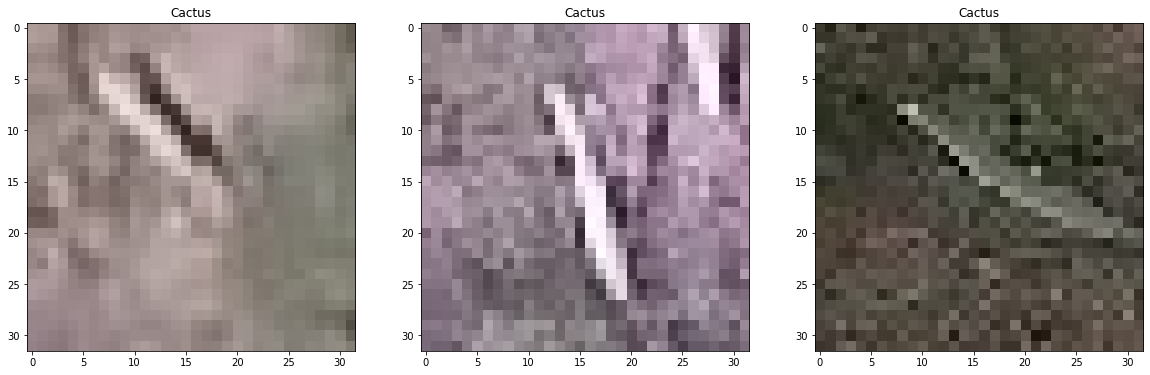

In [204]:
from PIL import Image
fig = plt.figure(1, figsize=(20, 20))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    pil_im = Image.open(train_dir + cacti.iloc[i, 0])
    im_arry = np.asarray(pil_im)
    arr = im_arry
    plt.title('Cactus')
    ax.imshow(arr)
plt.show()

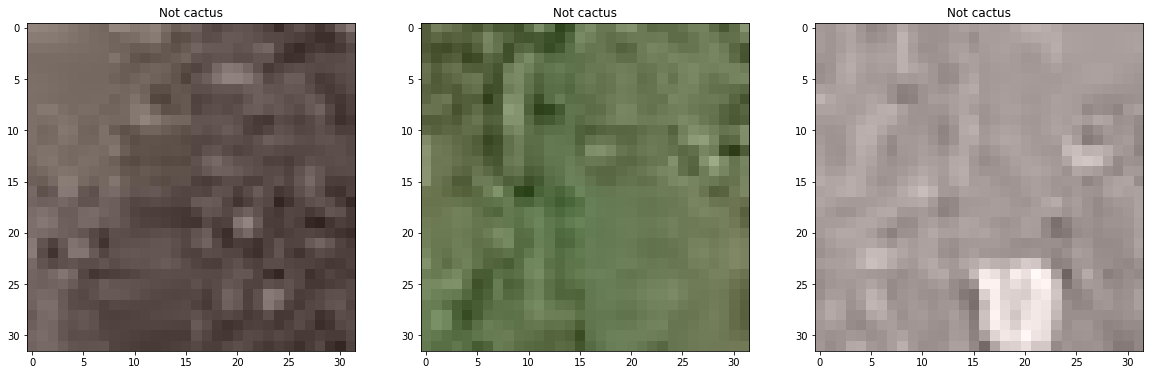

In [205]:
fig = plt.figure(1, figsize=(20, 20))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    pil_im = Image.open(train_dir + not_cacti.iloc[i, 0])
    im_arry = np.asarray(pil_im)
    arr = im_arry
    plt.title('Not cactus')
    ax.imshow(arr, cmap='viridis')
plt.show()

In [211]:
# Benchmark model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten

np.random.seed(100)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)               0         
__________

In [212]:
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [214]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

train_df.has_cactus = train_df.has_cactus.astype(str)
train_df = shuffle(train_df)
gen = ImageDataGenerator(rescale=1./255)
len_train = len(train_df.index)
ind = int(0.70*len_train)
train_gen = gen.flow_from_dataframe(dataframe=train_df[:ind],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=100,
                                            target_size=(32,32))


val_gen = gen.flow_from_dataframe(dataframe=train_df[ind:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(32,32))


Found 12250 validated image filenames belonging to 2 classes.
Found 5250 validated image filenames belonging to 2 classes.


In [215]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_gen, epochs=5, steps_per_epoch=100, validation_data=val_gen, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 14s 141ms/step - loss: 0.2732 - acc: 0.8713 - val_loss: 0.1778 - val_acc: 0.9288
Epoch 2/5
100/100 [==============================] - 8s 84ms/step - loss: 0.1490 - acc: 0.9435 - val_loss: 0.1276 - val_acc: 0.9544
Epoch 3/5
100/100 [==============================] - 7s 73ms/step - loss: 0.1216 - acc: 0.9523 - val_loss: 0.1236 - val_acc: 0.9548
Epoch 4/5
100/100 [==============================] - 7s 73ms/step - loss: 0.1022 - acc: 0.9619 - val_loss: 0.1451 - val_acc: 0.9472
Epoch 5/5
100/100 [==============================] - 7s 73ms/step - loss: 0.0889 - acc: 0.9675 - val_loss: 0.1180 - val_acc: 0.9556


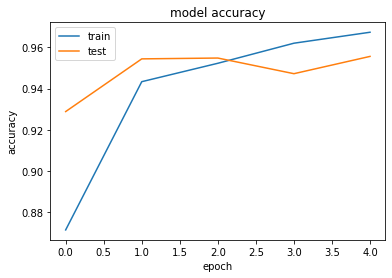

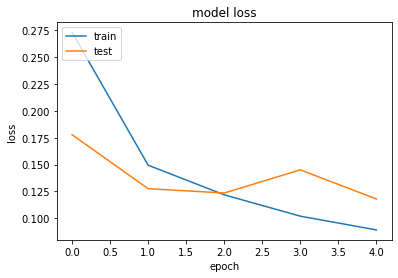

In [216]:
plot_history(history)

In [217]:
# Benchmark model has training acc greater than test accuracy -> could mean overfitting, solution: dropout
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 64)          18496     
__________

In [218]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_gen, epochs=5, steps_per_epoch=100, validation_data=val_gen, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 10s 99ms/step - loss: 0.3023 - acc: 0.8596 - val_loss: 0.1967 - val_acc: 0.9212
Epoch 2/5
100/100 [==============================] - 8s 81ms/step - loss: 0.1503 - acc: 0.9409 - val_loss: 0.1681 - val_acc: 0.9304
Epoch 3/5
100/100 [==============================] - 8s 79ms/step - loss: 0.1363 - acc: 0.9482 - val_loss: 0.2181 - val_acc: 0.9068
Epoch 4/5
100/100 [==============================] - 8s 79ms/step - loss: 0.1335 - acc: 0.9489 - val_loss: 0.1109 - val_acc: 0.9628
Epoch 5/5
100/100 [==============================] - 8s 79ms/step - loss: 0.1026 - acc: 0.9606 - val_loss: 0.0981 - val_acc: 0.9656


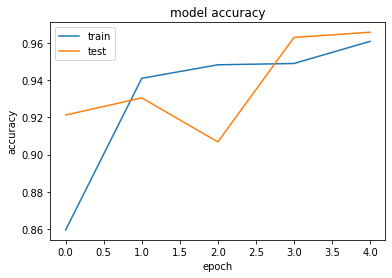

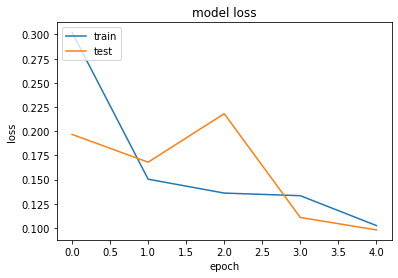

In [219]:
plot_history(history)

In [220]:
len_train = len(train_df.index)
ind = int(0.70*len_train)
train_rows = train_df[:ind].shape[0] // 100
val_rows = train_df[ind:].shape[0] // 50
print(train_rows)
print(val_rows)


122
105


In [221]:
aug_train_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rescale=1./255)
train_gen = aug_train_gen.flow_from_dataframe(dataframe=train_df[:ind],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=100,
                                            target_size=(32,32))


Found 12250 validated image filenames belonging to 2 classes.


In [222]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hd5', verbose=1, save_best_only=True)


In [223]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_gen, epochs=50, steps_per_epoch=train_rows, validation_data=val_gen, validation_steps=val_rows, callbacks=[checkpointer])

Epoch 1/50
122/122 [==============================] - 17s 143ms/step - loss: 0.1513 - acc: 0.9427 - val_loss: 0.0923 - val_acc: 0.9710

Epoch 00001: val_loss improved from inf to 0.09235, saving model to aug_model.weights.best.hd5
Epoch 2/50
122/122 [==============================] - 15s 126ms/step - loss: 0.1257 - acc: 0.9526 - val_loss: 0.1051 - val_acc: 0.9589

Epoch 00002: val_loss did not improve from 0.09235
Epoch 3/50
122/122 [==============================] - 16s 128ms/step - loss: 0.1071 - acc: 0.9620 - val_loss: 0.0911 - val_acc: 0.9632

Epoch 00003: val_loss improved from 0.09235 to 0.09108, saving model to aug_model.weights.best.hd5
Epoch 4/50
122/122 [==============================] - 16s 127ms/step - loss: 0.0869 - acc: 0.9671 - val_loss: 0.0672 - val_acc: 0.9785

Epoch 00004: val_loss improved from 0.09108 to 0.06716, saving model to aug_model.weights.best.hd5
Epoch 5/50
122/122 [==============================] - 16s 127ms/step - loss: 0.0870 - acc: 0.9683 - val_loss: 0.


Epoch 00042: val_loss did not improve from 0.02563
Epoch 43/50
122/122 [==============================] - 15s 126ms/step - loss: 0.0399 - acc: 0.9857 - val_loss: 0.0269 - val_acc: 0.9909

Epoch 00043: val_loss did not improve from 0.02563
Epoch 44/50
122/122 [==============================] - 15s 126ms/step - loss: 0.0423 - acc: 0.9844 - val_loss: 0.0572 - val_acc: 0.9758

Epoch 00044: val_loss did not improve from 0.02563
Epoch 45/50
122/122 [==============================] - 16s 127ms/step - loss: 0.0357 - acc: 0.9875 - val_loss: 0.0761 - val_acc: 0.9699

Epoch 00045: val_loss did not improve from 0.02563
Epoch 46/50
122/122 [==============================] - 15s 126ms/step - loss: 0.0442 - acc: 0.9837 - val_loss: 0.0319 - val_acc: 0.9893

Epoch 00046: val_loss did not improve from 0.02563
Epoch 47/50
122/122 [==============================] - 15s 127ms/step - loss: 0.0387 - acc: 0.9852 - val_loss: 0.0326 - val_acc: 0.9863

Epoch 00047: val_loss did not improve from 0.02563
Epoch 48

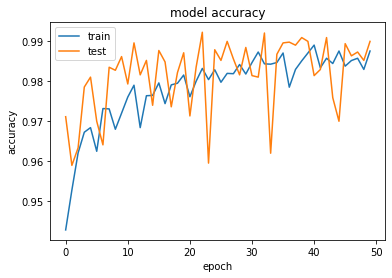

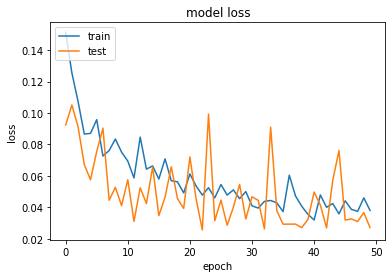

In [224]:
plot_history(history)

In [226]:
model.load_weights("aug_model.weights.best.hd5")

In [227]:
import os
x_test = []
ids = []
for f in os.listdir(test_dir):
    ids.append(f)
    path = os.path.join(test_dir, f)
    pil_arr = np.asarray(Image.open(path))
    x_test.append(pil_arr)
x_test = np.array(x_test)
print(x_test.shape)
x_test = x_test.astype('float32')/255

(3975, 32, 32, 3)


In [228]:
predictions = model.predict_proba(x_test)

In [229]:
test_df = pd.DataFrame({'id': ids, 'has_cactus': predictions.flatten()})

In [230]:
test_df.to_csv("samplesubmission.csv", index=False)

In [231]:
from keras.applications.vgg16 import VGG16

In [232]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [233]:
for layer in vgg16.layers:
    layer.trainable = False

In [234]:
vgg_model = Sequential()
vgg_model.add(vgg16)
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation = 'relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(128, activation = 'relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1, activation = 'sigmoid'))

vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_20 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_20 (Batc (None, 128)               512       
__________

In [241]:
from keras import optimizers
optim = optimizers.Adam(lr=0.001)
vgg_model.compile(loss = 'binary_crossentropy', optimizer = optim, metrics = ['accuracy'])
vgg_checkpointer = ModelCheckpoint(filepath='vggmodel.weights.best.hd5', verbose=1, save_best_only=True)


In [236]:
# import os
# x_train = []
# for f in os.listdir(train_dir):
#     path = os.path.join(train_dir, f)
#     pil_arr = np.asarray(Image.open(path))
#     x_train.append(pil_arr)
# x_train = np.array(x_train)
# x_train = x_train.astype('float32')/255

In [237]:
# y_train = train_df['has_cactus']

In [238]:
# from sklearn.model_selection import train_test_split

In [239]:
# x_trainn, x_valid, y_trainn, y_valid = train_test_split(x_train, y_train, random_state=42, test_size=0.33)

In [243]:
vgg_history = vgg_model.fit_generator(train_gen, epochs=5, steps_per_epoch=train_rows, validation_data=val_gen, validation_steps=val_rows, callbacks=[vgg_checkpointer])

Epoch 1/5
122/122 [==============================] - 60s 490ms/step - loss: 0.3083 - acc: 0.8793 - val_loss: 0.1391 - val_acc: 0.9472

Epoch 00001: val_loss improved from inf to 0.13912, saving model to vggmodel.weights.best.hd5
Epoch 2/5
122/122 [==============================] - 71s 583ms/step - loss: 0.1705 - acc: 0.9421 - val_loss: 0.1322 - val_acc: 0.9472

Epoch 00002: val_loss improved from 0.13912 to 0.13223, saving model to vggmodel.weights.best.hd5
Epoch 3/5
122/122 [==============================] - 76s 621ms/step - loss: 0.1389 - acc: 0.9511 - val_loss: 0.1243 - val_acc: 0.9472

Epoch 00003: val_loss improved from 0.13223 to 0.12426, saving model to vggmodel.weights.best.hd5
Epoch 4/5
122/122 [==============================] - 73s 595ms/step - loss: 0.1312 - acc: 0.9529 - val_loss: 0.1826 - val_acc: 0.9257

Epoch 00004: val_loss did not improve from 0.12426
Epoch 5/5
122/122 [==============================] - 72s 588ms/step - loss: 0.1176 - acc: 0.9582 - val_loss: 0.1733 - v

In [244]:
vgg_model.load_weights("vggmodel.weights.best.hd5")

In [246]:
vgg_predictions = model.predict_proba(x_test)

In [247]:
vgg_test_df = pd.DataFrame({'id': ids, 'has_cactus': vgg_predictions.flatten()})

In [248]:
vgg_test_df.to_csv("vggsubmission.csv", index=False)

In [249]:
from keras.applications.resnet50 import ResNet50

In [250]:
resnet = ResNet50(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)
resnet.summary()

W0714 13:49:02.721581 15560 deprecation_wrapper.py:119] From c:\users\sraddhanjali acharya\pycharmprojects\udacity\aerialcactusidentify\ve\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

c:\users\sraddhanjali acharya\pycharmprojects\udacity\aerialcactusidentify\ve\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 438s 5us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________

In [251]:
for layer in resnet.layers:
    layer.trainable = False

In [252]:
resnet_model = Sequential()
resnet_model.add(resnet)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation = 'relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(128, activation = 'relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1, activation = 'sigmoid'))

resnet_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_21 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               524544    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
__________

In [253]:
resnet_model.compile(loss = 'binary_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [254]:
resnet_checkpointer = ModelCheckpoint(filepath='resnet.weights.best.hd5', verbose=1, save_best_only=True)


In [255]:
resnet_history = resnet_model.fit_generator(train_gen, epochs=5, steps_per_epoch=train_rows, validation_data=val_gen, validation_steps=val_rows, callbacks=[resnet_checkpointer])

Epoch 1/5
122/122 [==============================] - 78s 639ms/step - loss: 0.2413 - acc: 0.9077 - val_loss: 10.5275 - val_acc: 0.2493

Epoch 00001: val_loss improved from inf to 10.52746, saving model to resnet.weights.best.hd5
Epoch 2/5
122/122 [==============================] - 74s 604ms/step - loss: 0.1540 - acc: 0.9434 - val_loss: 9.9577 - val_acc: 0.2493

Epoch 00002: val_loss improved from 10.52746 to 9.95773, saving model to resnet.weights.best.hd5
Epoch 3/5
122/122 [==============================] - 76s 626ms/step - loss: 0.1372 - acc: 0.9508 - val_loss: 10.1414 - val_acc: 0.2493

Epoch 00003: val_loss did not improve from 9.95773
Epoch 4/5
105/122 [========================>.....] - ETA: 7s - loss: 0.1335 - acc: 0.9496

KeyboardInterrupt: 